# **Forecasting**

## I. Introduction

## II. External Links

## III. Working Area

### a. Library Import

In [124]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
#preprocessing tools
from sklearn.preprocessing import MinMaxScaler

#evaluation tools
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(42)

### b. Exploratory Data Analysis (EDA)

In [4]:
xls = pd.ExcelFile('kalbe_data.xlsx')
df_a1 = pd.read_excel(xls, 'A1')
df_a2 = pd.read_excel(xls, 'A2')
df_b1 = pd.read_excel(xls, 'B1')
df_b2 = pd.read_excel(xls, 'B2')

In [6]:
df_a1

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401
...,...,...,...,...
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498


In [7]:
df_a1.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [8]:
df_a2

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501
...,...,...,...,...
85,86,A,A2,1527.971484
86,87,A,A2,1535.611342
87,88,A,A2,1543.289398
88,89,A,A2,1551.005845


In [9]:
df_a2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [10]:
df_b1

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0
...,...,...,...,...,...
99,100,B,B1,NaN,0
100,101,B,B1,NaN,1
101,102,B,B1,NaN,0
102,103,B,B1,NaN,0


In [11]:
df_b1.isnull().sum()

Day          0
Category     0
Product      0
Sales       14
Event        0
dtype: int64

In [12]:
df_b2

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN
...,...,...,...,...
99,100,B,B2,NaN
100,101,B,B2,NaN
101,102,B,B2,NaN
102,103,B,B2,NaN


In [13]:
df_b2.isnull().sum()

Day          0
Category     0
Product      0
Sales       74
dtype: int64

<AxesSubplot:xlabel='Day', ylabel='Sales'>

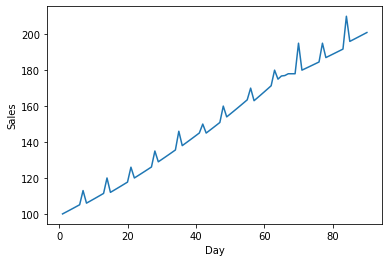

In [14]:
sns.lineplot(y='Sales', x='Day', data=df_a1)

<AxesSubplot:xlabel='Day', ylabel='Sales'>

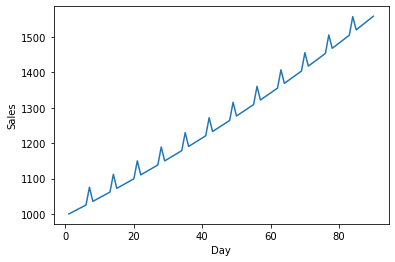

In [15]:
sns.lineplot(y='Sales', x='Day', data=df_a2)

<AxesSubplot:xlabel='Day', ylabel='Sales'>

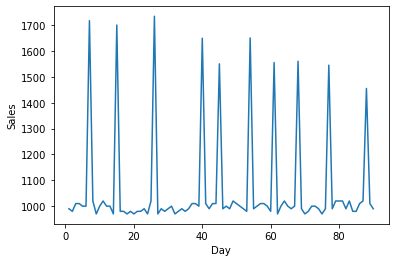

In [16]:
sns.lineplot(y='Sales', x='Day', data=df_b1)

<AxesSubplot:xlabel='Day', ylabel='Sales'>

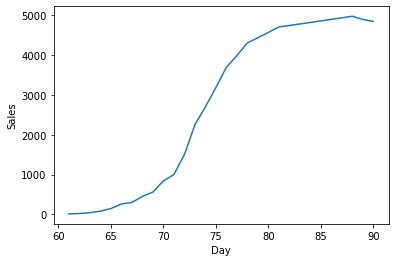

In [17]:
sns.lineplot(y='Sales', x='Day', data=df_b2)

### c. Feature Engineering

In [18]:
df_a1.tail(14)

,Day,Category,Product,Sales
76,77,A,A1,195.000000
77,78,A,A1,187.000000
78,79,A,A1,187.935000
79,80,A,A1,188.874675
80,81,A,A1,189.819048
81,82,A,A1,190.768144
82,83,A,A1,191.721984
83,84,A,A1,210.000000
84,85,A,A1,196.000000
85,86,A,A1,196.980000


In [29]:
train_a1 = df_a1[0:76] 
test_a1 = df_a1[76:]

test_a1.tail()

,Day,Category,Product,Sales
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498
89,90,A,A1,200.949246


In [21]:
df_a2.tail(14)

,Day,Category,Product,Sales
76,77,A,A2,1505.900688
77,78,A,A2,1468.205191
78,79,A,A2,1475.546217
79,80,A,A2,1482.923948
80,81,A,A2,1490.338568
81,82,A,A2,1497.790261
82,83,A,A2,1505.279212
83,84,A,A2,1557.805608
84,85,A,A2,1520.369636
85,86,A,A2,1527.971484


In [22]:
train_a2 = df_a2[0:76] 
test_a2 = df_a2[76:]

test_a2.tail()

,Day,Category,Product,Sales
85,86,A,A2,1527.971484
86,87,A,A2,1535.611342
87,88,A,A2,1543.289398
88,89,A,A2,1551.005845
89,90,A,A2,1558.760875


In [25]:
b1_na = df_b1.query("Sales.isna()")

In [26]:
b1_na

,Day,Category,Product,Sales,Event
90,91,B,B1,NaN,0
91,92,B,B1,NaN,0
92,93,B,B1,NaN,0
93,94,B,B1,NaN,1
94,95,B,B1,NaN,0
95,96,B,B1,NaN,0
96,97,B,B1,NaN,0
97,98,B,B1,NaN,0
98,99,B,B1,NaN,0
99,100,B,B1,NaN,0


In [28]:
df_b1.dropna(inplace=True)

In [30]:
train_b1 = df_b1[0:76] 
test_b1 = df_b1[76:]

test_b1.tail()

,Day,Category,Product,Sales,Event
85,86,B,B1,1010.0,0
86,87,B,B1,1020.0,0
87,88,B,B1,1455.0,1
88,89,B,B1,1010.0,0
89,90,B,B1,990.0,0


In [35]:
b2_na = df_b2.query("Sales.isna()")
b2_na

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN
...,...,...,...,...
99,100,B,B2,NaN
100,101,B,B2,NaN
101,102,B,B2,NaN
102,103,B,B2,NaN


In [36]:
df_b2.dropna(inplace=True)

In [37]:
df_b2.tail(14)

,Day,Category,Product,Sales
76,77,B,B2,3991.420800
77,78,B,B2,4310.734464
78,79,B,B2,4440.056498
79,80,B,B2,4573.258193
80,81,B,B2,4710.455939
81,82,B,B2,4748.139586
82,83,B,B2,4786.124703
83,84,B,B2,4824.413700
84,85,B,B2,4863.009010
85,86,B,B2,4901.913082


In [38]:
train_b2 = df_b2[0:16] 
test_b2 = df_b2[16:]

test_b2.tail()

,Day,Category,Product,Sales
85,86,B,B2,4901.913082
86,87,B,B2,4941.128387
87,88,B,B2,4980.657414
88,89,B,B2,4900.000000
89,90,B,B2,4850.000000


### d. Forecasting

#### 1. Product A1

##### I. Holt Linear Trend

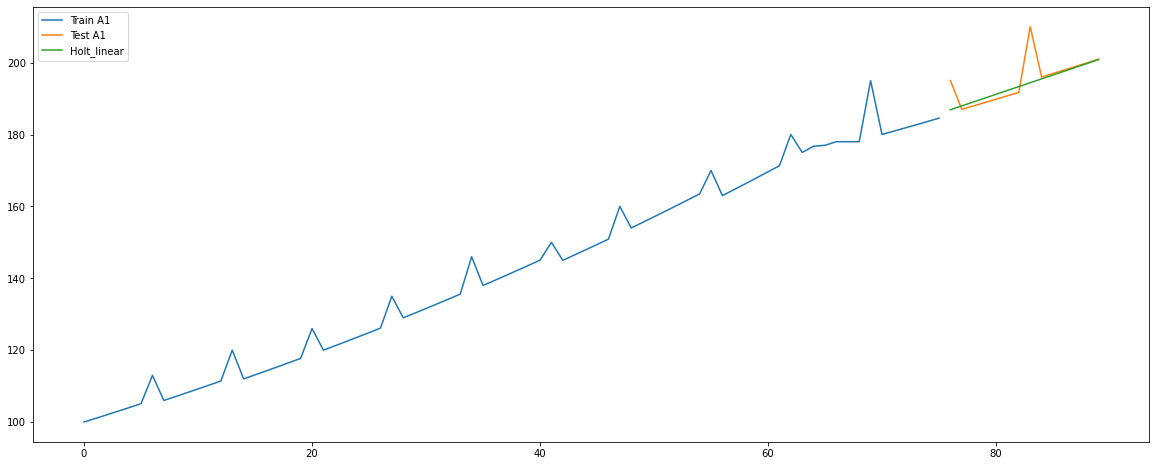

In [59]:
y_hlt_a1 = test_a1.copy()
fit1 = Holt(np.asarray(train_a1['Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.05)
y_hlt_a1['Holt_linear'] = fit1.forecast(len(test_a1))
plt.figure(figsize=(20,8))
plt.plot(train_a1['Sales'], label='Train A1')
plt.plot(test_a1['Sales'], label='Test A1')
plt.plot(y_hlt_a1['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [60]:
print("mae :", mean_absolute_error(test_a1.Sales, y_hlt_a1.Holt_linear))
print("rmse :", sqrt(mean_squared_error(test_a1.Sales, y_hlt_a1.Holt_linear)))

mae : 2.3759421111321086
rmse : 4.780715493966364


##### II. Holt-Winters

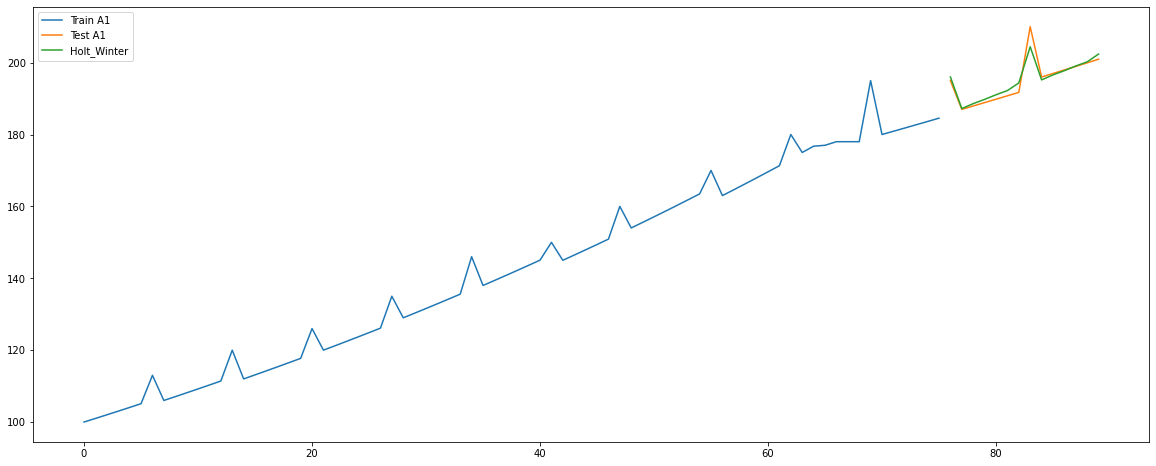

In [73]:
y_hw_a1 = test_a1.copy()
fit1 = ExponentialSmoothing(np.asarray(train_a1['Sales']) ,seasonal_periods=7 ,trend='add', seasonal='multiplicative',).fit()
y_hw_a1['Holt_Winter'] = fit1.forecast(len(test_a1))
plt.figure(figsize=(20,8))
plt.plot(train_a1['Sales'], label='Train A1')
plt.plot(test_a1['Sales'], label='Test A1')
plt.plot(y_hw_a1['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [74]:
print("mae :", mean_absolute_error(test_a1.Sales, y_hw_a1.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test_a1.Sales, y_hw_a1.Holt_Winter)))

mae : 1.2066409183426836
rmse : 1.8316543924237956


##### III. SARIMAX

In [119]:
sarimax_a1 = df_a1.copy()

In [121]:
sarimax_a1.head(5)

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [122]:
# Set the start date of the time series
start_date = '2022-01-01'

# Create a date range based on the start date and the length of the data
sarimax_a1['Day'] = pd.date_range(start=start_date, periods=len(sarimax_a1), freq='D')
sarimax_a1.index = pd.to_datetime(sarimax_a1['Day'])
sarimax_a1.drop(['Day'], axis=1, inplace=True)
sarimax_a1.head(2)

,Category,Product,Sales
Day,,,
2022-01-01,A,A1,100.0
2022-01-02,A,A1,101.0


In [131]:
y_train = sarimax_a1['Sales'][0:76]
y_test = sarimax_a1['Sales'][76:]

In [137]:
y_train = pd.DataFrame(y_train)

In [158]:
minmax = MinMaxScaler(feature_range=(0,1))
scaler_output = minmax.fit_transform(y_train[['Sales']])

In [159]:
train_scaler = pd.DataFrame(scaler_output)
train_scaler.rename(columns={0:'Sales'}, inplace= True)
train_scaler

,Sales
0,0.000000
1,0.010526
2,0.021158
3,0.031896
4,0.042741
...,...
71,0.851579
72,0.861100
73,0.870669
74,0.880285


In [160]:
y_test = pd.DataFrame(y_test)
test_scaler = minmax.transform(y_test[['Sales']])
test_scaler = pd.DataFrame(test_scaler)
test_scaler.rename(columns={0:'Sales'}, inplace= True)
test_scaler

,Sales
0,1.000000
1,0.915789
2,0.925632
3,0.935523
4,0.945464
5,0.955454
6,0.965495
7,1.157895
8,1.010526
9,1.020842


In [161]:
from statsmodels.tsa.stattools import adfuller

def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [184]:
sarimax_a1

,Category,Product,Sales
Day,,,
2022-01-01,A,A1,100.000000
2022-01-02,A,A1,101.000000
2022-01-03,A,A1,102.010000
2022-01-04,A,A1,103.030100
2022-01-05,A,A1,104.060401
...,...,...,...
2022-03-27,A,A1,196.980000
2022-03-28,A,A1,197.964900
2022-03-29,A,A1,198.954724


In [186]:
test_adf(sarimax_a1['Sales'].diff(), "Sales")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary Sales


In [191]:
sarimax_a1['Sales']

Day
2022-01-01    100.000000
2022-01-02    101.000000
2022-01-03    102.010000
2022-01-04    103.030100
2022-01-05    104.060401
                 ...    
2022-03-27    196.980000
2022-03-28    197.964900
2022-03-29    198.954724
2022-03-30    199.949498
2022-03-31    200.949246
Name: Sales, Length: 90, dtype: float64

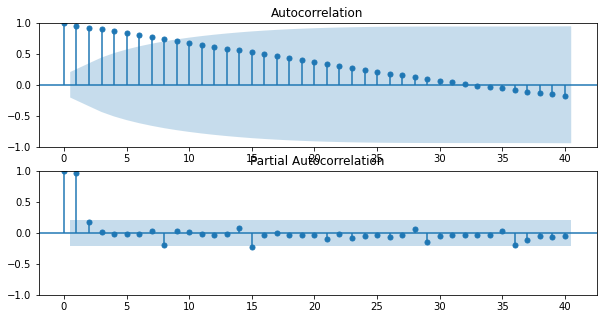

In [206]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(sarimax_a1['Sales'], lags=40, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(sarimax_a1['Sales'], lags=40, ax=ax[1])
plt.show()

In [ ]:
test_scaler = minmax.transform(y_test)

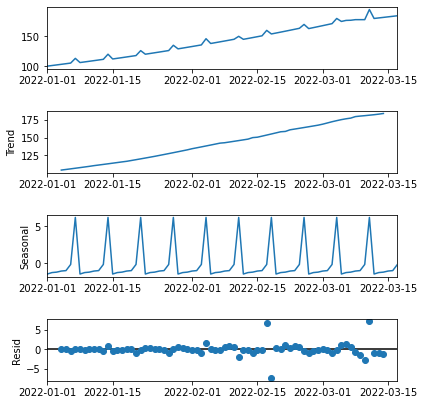

In [175]:
seas_d=sm.tsa.seasonal_decompose(y_train,model='add',period=7)

fig=seas_d.plot()
fig.set_figheight(6)
plt.show()

In [219]:
from pmdarima.arima import auto_arima

step_wise=auto_arima(sarimax_a1['Sales'],
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=3,
 start_P=1, start_Q=1,
 max_P=10, max_Q=15,
 D=1, max_D=3,
 trace=1, m=7,
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=375.287, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=434.452, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=385.806, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=375.869, Time=0.14 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=374.488, Time=0.17 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=389.519, Time=0.05 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=376.482, Time=0.28 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=373.871, Time=0.09 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=375.802, Time=0.21 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=376.749, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=375.890, Time=0.11 sec
 ARIMA(2,1,1)(1,1,0)[7]             : AIC=375.303, Time=0.17 sec
 ARIMA(1,1,2)(1,1,0)[7]             : AIC=374.570, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=419.323, Time=0.05 sec
 ARIMA(0,1,2)(1,1,0)[7]             : AIC=372.9

<AxesSubplot:xlabel='Day'>

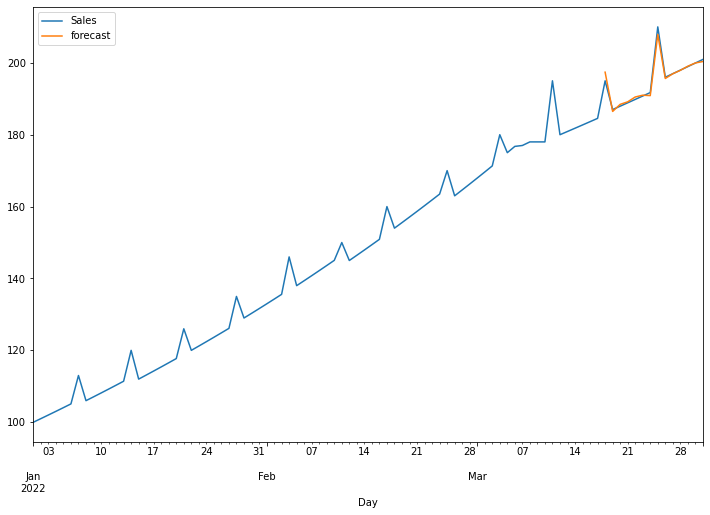

In [223]:
model=sm.tsa.statespace.SARIMAX(sarimax_a1['Sales'],order=(0,0,0),seasonal_order=(9,2,14,7))
results = model.fit()
sarimax_a1['forecast'] = results.predict(start=76, end=90, dynamic=True, )
sarimax_a1[['Sales','forecast']].plot(figsize=(12,8))

In [226]:
print("mae :", mean_absolute_error(sarimax_a1.Sales.iloc[76:90], sarimax_a1.forecast.iloc[76:90]))
print("rmse :", sqrt(mean_squared_error(sarimax_a1.Sales.iloc[76:90], sarimax_a1.forecast.iloc[76:90])))

mae : 0.6185747115618706
rmse : 0.9408700087215436


#### 2. Product A2

##### i. Naive Approach

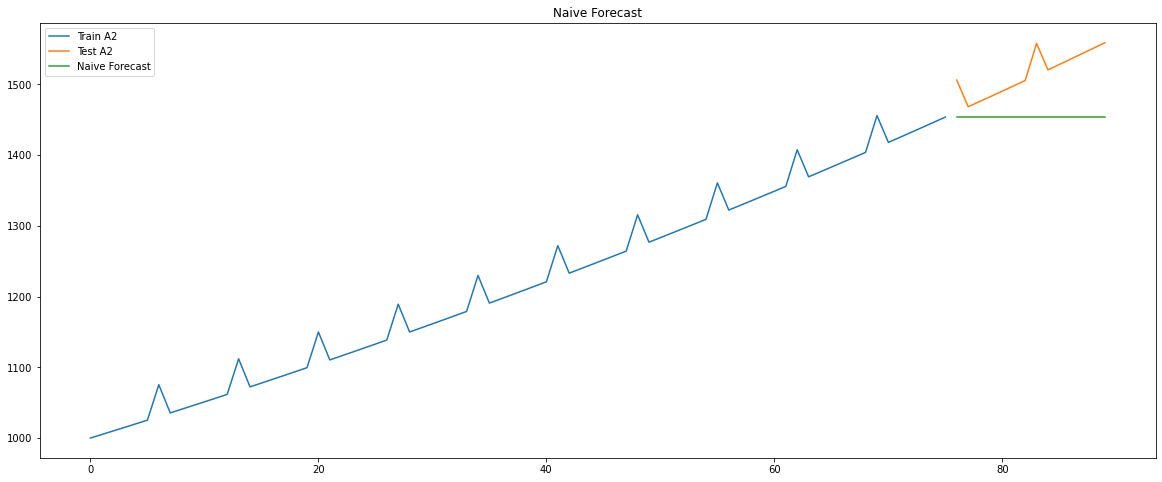

In [49]:
na_A2= np.asarray(train_A2.Sales)
y_na_A2 = test_A2.copy()
y_na_A2['naive'] = na_A2[len(na_A2)-1]
plt.figure(figsize=(20,8))
plt.plot(train_A2.index, train_A2['Sales'], label='Train A2')
plt.plot(test_A2.index,test_A2['Sales'], label='Test A2')
plt.plot(y_na_A2.index,y_na_A2['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [50]:
rmse = sqrt(mean_squared_error(test_A2.Sales, y_na_A2.naive))
mae = mean_absolute_error(test_A2.Sales, y_na_A2.naive)

print("mae :",mae)
print("rmse :",rmse)

mae : 62.13878020093939
rmse : 68.85373166883633


##### ii. Simple Average

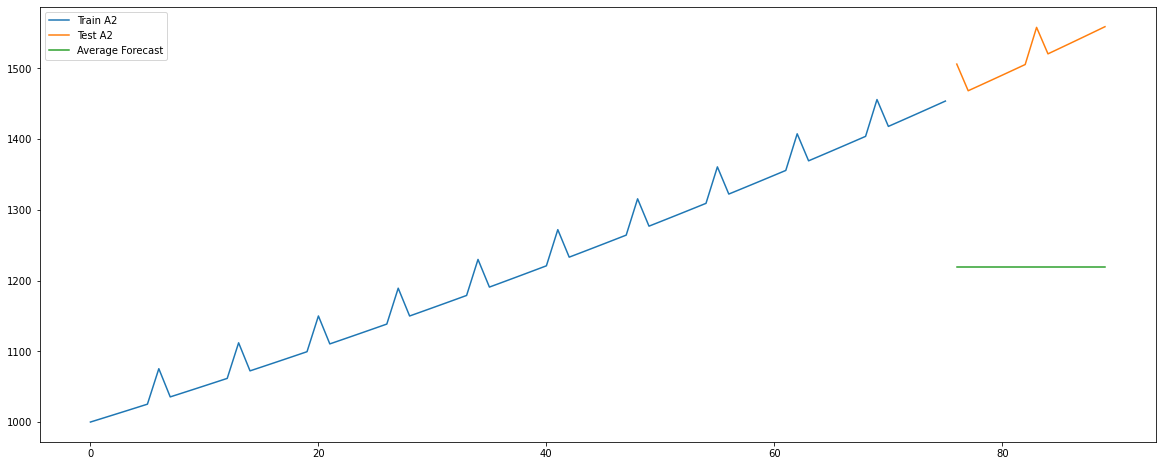

In [104]:
y_sa_A2 = test_A2.copy()
y_sa_A2['avg_forecast'] = train_A2['Sales'].mean()
plt.figure(figsize=(20,8))
plt.plot(train_A2['Sales'], label='Train A2')
plt.plot(test_A2['Sales'], label='Test A2')
plt.plot(y_sa_A2['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [105]:
print("mae :", mean_absolute_error(test_A2.Sales, y_sa_A2.avg_forecast))
print("rmse :", sqrt(mean_squared_error(test_A2.Sales, y_sa_A2.avg_forecast)))

mae : 296.95370619525784
rmse : 298.4310841433294


##### iii. Moving Average

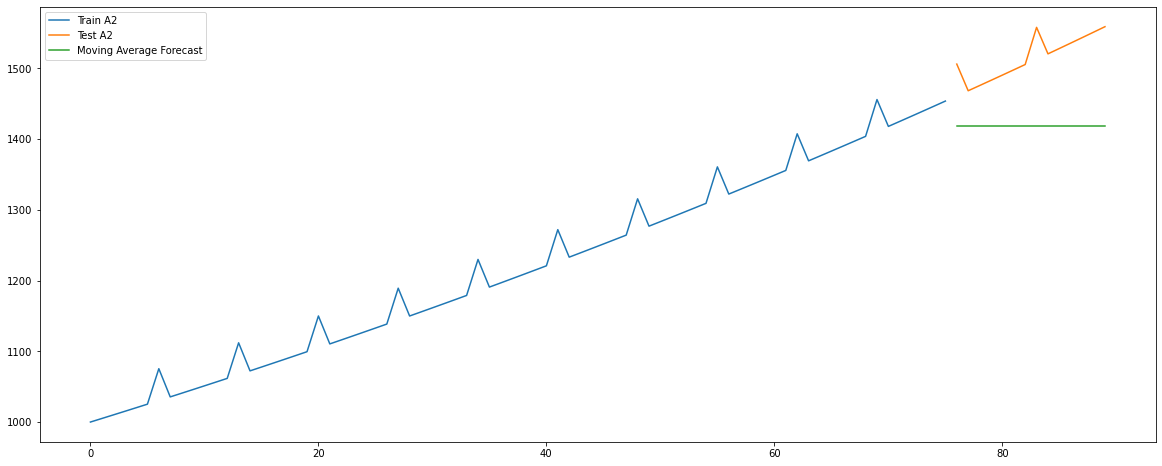

In [106]:
y_ma_A2 = test_A2.copy()
y_ma_A2['moving_avg_forecast'] = train_A2['Sales'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(20,8))
plt.plot(train_A2['Sales'], label='Train A2')
plt.plot(test_A2['Sales'], label='Test A2')
plt.plot(y_ma_A2['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [107]:
print("mae :", mean_absolute_error(test_A2.Sales, y_ma_A2.moving_avg_forecast))
print("rmse :", sqrt(mean_squared_error(test_A2.Sales, y_ma_A2.moving_avg_forecast)))

mae : 97.51248471079471
rmse : 101.92297598842191


##### iv. Simple Exponential Smoothing

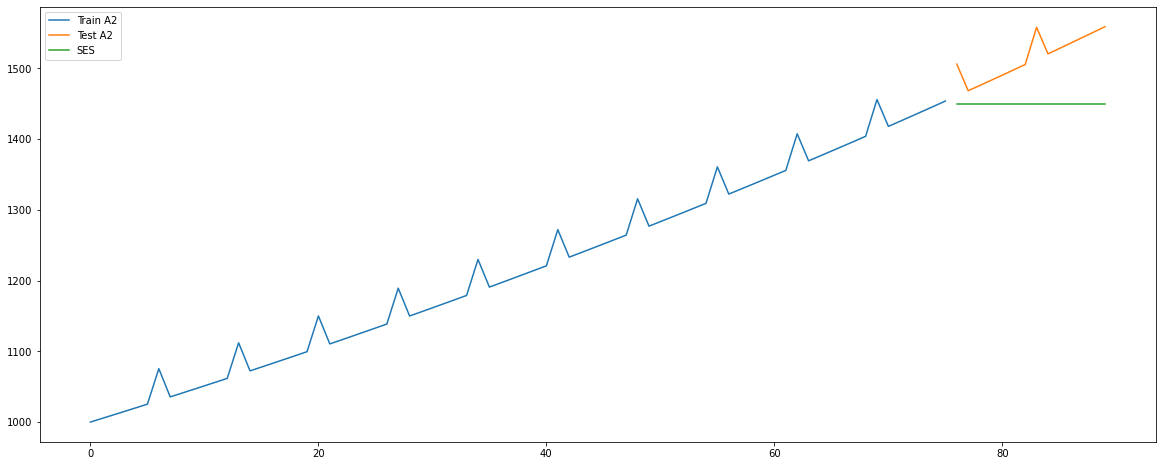

In [108]:
y_ses_A2 = test_A2.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_A2['Sales'])).fit(smoothing_level=0.6,optimized=False)
y_ses_A2['SES'] = fit2.forecast(len(test_A2))
plt.figure(figsize=(20,8))
plt.plot(train_A2['Sales'], label='Train A2')
plt.plot(test_A2['Sales'], label='Test A2')
plt.plot(y_ses_A2['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [109]:
print("mae :", mean_absolute_error(test_A2.Sales, y_ses_A2.SES))
print("rmse :", sqrt(mean_squared_error(test_A2.Sales, y_ses_A2.SES)))

mae : 66.83340348649581
rmse : 73.11848043724794


##### v. Holt Linear Trend

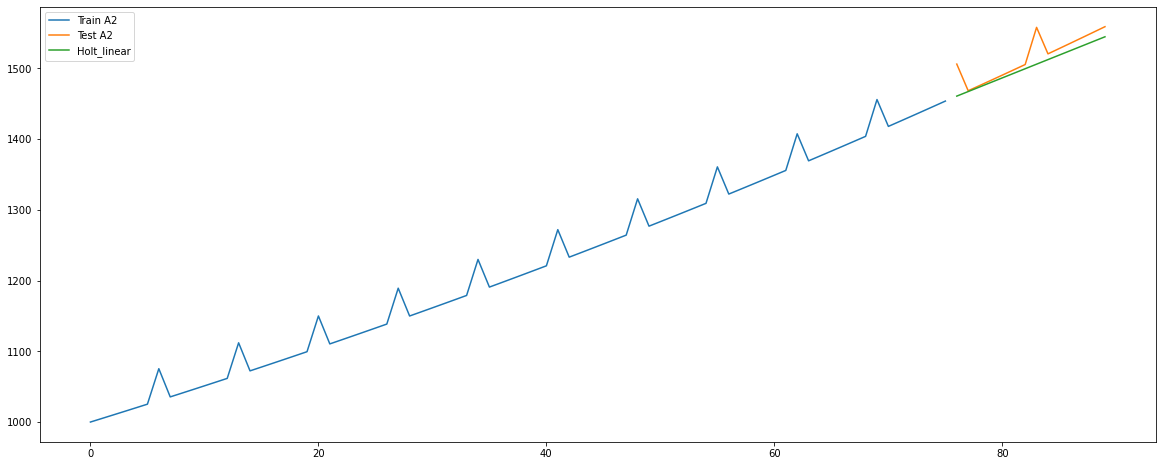

In [110]:
y_hlt_A2 = test_A2.copy()
fit1 = Holt(np.asarray(train_A2['Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hlt_A2['Holt_linear'] = fit1.forecast(len(test_A2))
plt.figure(figsize=(20,8))
plt.plot(train_A2['Sales'], label='Train A2')
plt.plot(test_A2['Sales'], label='Test A2')
plt.plot(y_hlt_A2['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [111]:
print("mae :", mean_absolute_error(test_A2.Sales, y_hlt_A2.Holt_linear))
print("rmse :", sqrt(mean_squared_error(test_A2.Sales, y_hlt_A2.Holt_linear)))

mae : 13.208632933121748
rmse : 20.02481935460653


##### vi. Holt-Winters

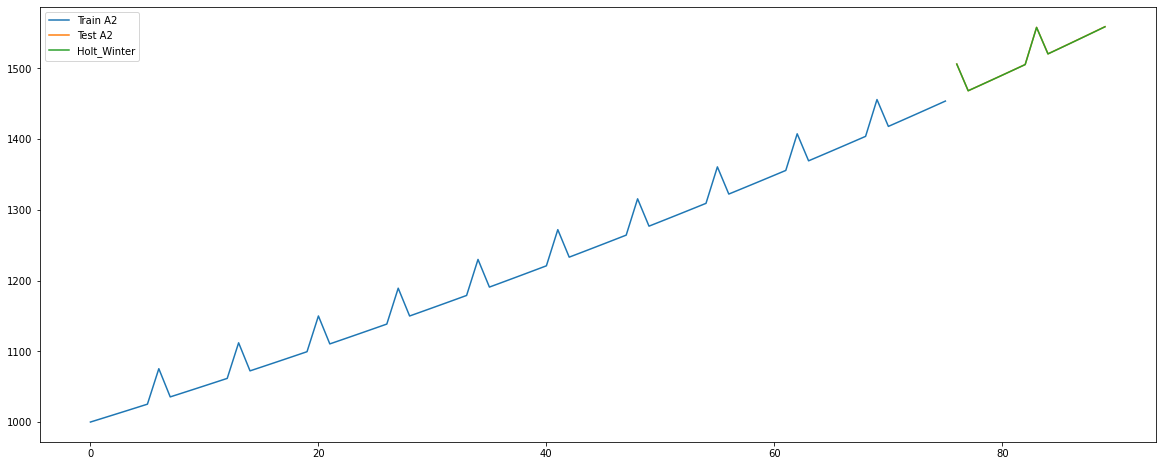

In [204]:
y_hw_A2 = test_A2.copy()
fit1 = ExponentialSmoothing(np.asarray(train_A2['Sales']) ,seasonal_periods=7 ,trend='multiplicative', seasonal='add').fit()
y_hw_A2['Holt_Winter'] = fit1.forecast(len(test_A2))
plt.figure(figsize=(20,8))
plt.plot(train_A2['Sales'], label='Train A2')
plt.plot(test_A2['Sales'], label='Test A2')
plt.plot(y_hw_A2['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [205]:
print("mae :", mean_absolute_error(test_A2.Sales, y_hw_A2.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test_A2.Sales, y_hw_A2.Holt_Winter)))

mae : 0.06354442640827074
rmse : 0.07348849610375177


##### vii. ARMA

In [182]:
arma_A2 = dfA2.copy()

In [183]:
arma_A2.drop(['Day', 'Category', 'Product'], axis =1, inplace=True)

In [184]:
# Set the start date of the time series
start_date = '2022-01-01'

# Create a date range based on the start date and the length of the data
arma_A2['Day'] = pd.date_range(start=start_date, periods=len(arma_A2), freq='D')

In [185]:
arma_A2.index = pd.to_datetime(arma_A2['Day'])

In [186]:
arma_A2.drop(['Day'], axis=1, inplace=True)

In [187]:
arma_A2.tail(14)

,Sales
Day,
2022-03-18,1505.900688
2022-03-19,1468.205191
2022-03-20,1475.546217
2022-03-21,1482.923948
2022-03-22,1490.338568
2022-03-23,1497.790261
2022-03-24,1505.279212
2022-03-25,1557.805608
2022-03-26,1520.369636


<AxesSubplot:xlabel='Day'>

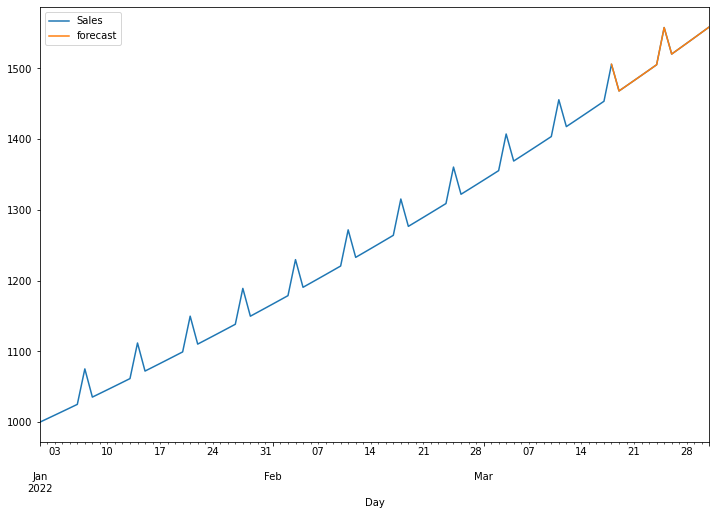

In [308]:
model=sm.tsa.statespace.SARIMAX(arma_A2['Sales'],order=(0,0,0),seasonal_order=(8,2,0,7))
results = model.fit()
arma_A2['forecast'] = results.predict(start=76, end=90, dynamic=True, )
arma_A2[['Sales','forecast']].plot(figsize=(12,8))

In [309]:
print("mae :", mean_absolute_error(arma_A2.Sales.iloc[76:90], arma_A2.forecast.iloc[76:90]))
print("rmse :", sqrt(mean_squared_error(arma_A2.Sales.iloc[76:90], arma_A2.forecast.iloc[76:90])))

mae : 0.0036443343578054866
rmse : 0.00370649157521669


#### 3. Product B1

##### i. Naive Approach

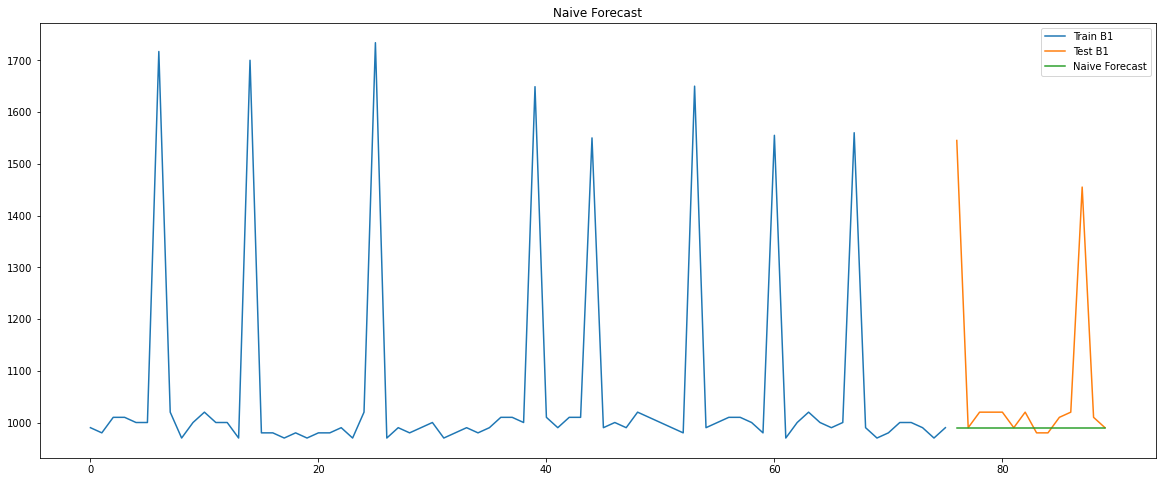

In [114]:
na_B1= np.asarray(train_B1.Sales)
y_na_B1 = test_B1.copy()
y_na_B1['naive'] = na_B1[len(na_B1)-1]
plt.figure(figsize=(20,8))
plt.plot(train_B1.index, train_B1['Sales'], label='Train B1')
plt.plot(test_B1.index,test_B1['Sales'], label='Test B1')
plt.plot(y_na_B1.index,y_na_B1['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [115]:
rmse = sqrt(mean_squared_error(test_B1.Sales, y_na_B1.naive))
mae = mean_absolute_error(test_B1.Sales, y_na_B1.naive)

print("mae :",mae)
print("rmse :",rmse)

mae : 87.85714285714286
rmse : 194.5232266704563


##### ii. Simple Average

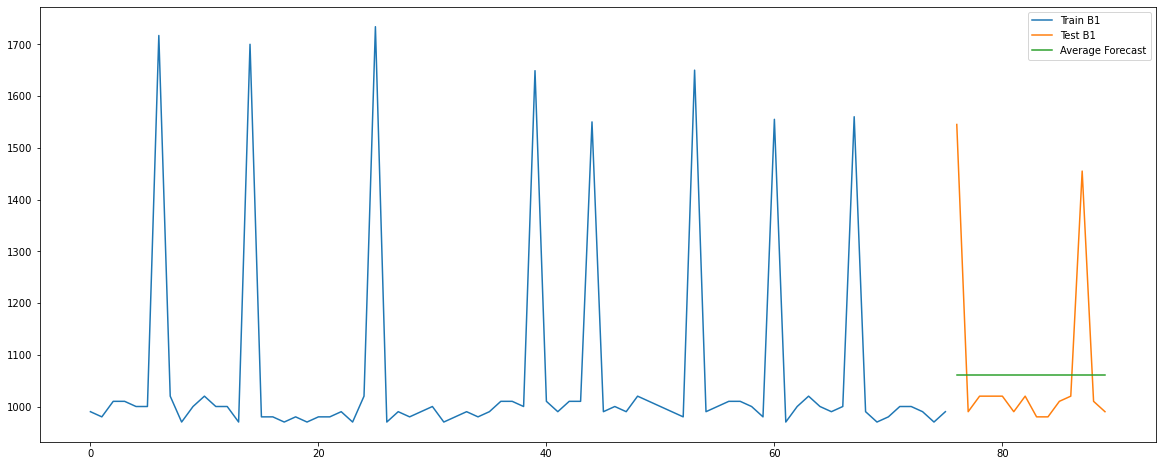

In [116]:
y_sa_B1 = test_B1.copy()
y_sa_B1['avg_forecast'] = train_B1['Sales'].mean()
plt.figure(figsize=(20,8))
plt.plot(train_B1['Sales'], label='Train B1')
plt.plot(test_B1['Sales'], label='Test B1')
plt.plot(y_sa_B1['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [117]:
print("mae :", mean_absolute_error(test_B1.Sales, y_sa_B1.avg_forecast))
print("rmse :", sqrt(mean_squared_error(test_B1.Sales, y_sa_B1.avg_forecast)))

mae : 111.32518796992485
rmse : 175.54019281810682


##### iii. Moving Average

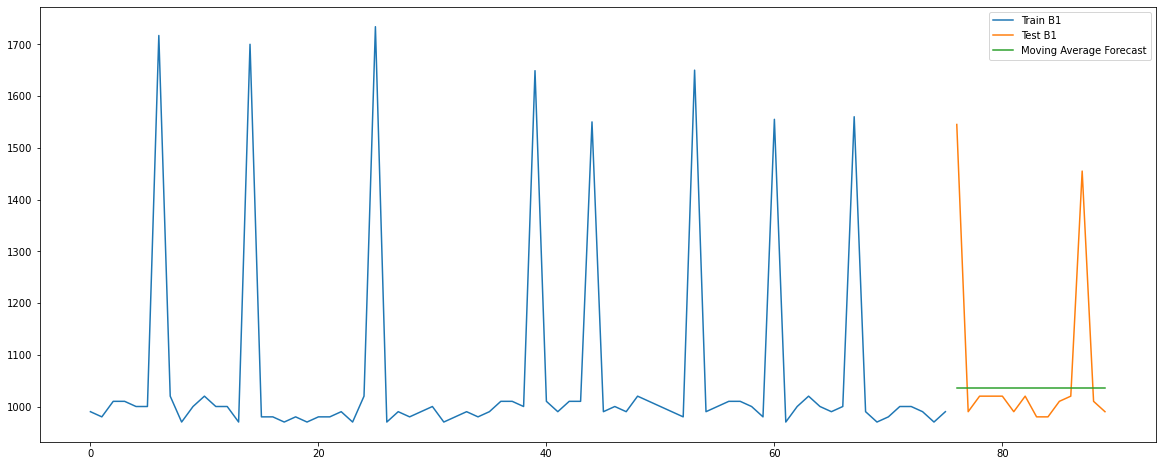

In [118]:
y_ma_B1 = test_B1.copy()
y_ma_B1['moving_avg_forecast'] = train_B1['Sales'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(20,8))
plt.plot(train_B1['Sales'], label='Train B1')
plt.plot(test_B1['Sales'], label='Test B1')
plt.plot(y_ma_B1['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [119]:
print("mae :", mean_absolute_error(test_B1.Sales, y_ma_B1.moving_avg_forecast))
print("rmse :", sqrt(mean_squared_error(test_B1.Sales, y_ma_B1.moving_avg_forecast)))

mae : 94.04761904761911
rmse : 179.11931821757852


##### iv. Simple Exponential Smoothing

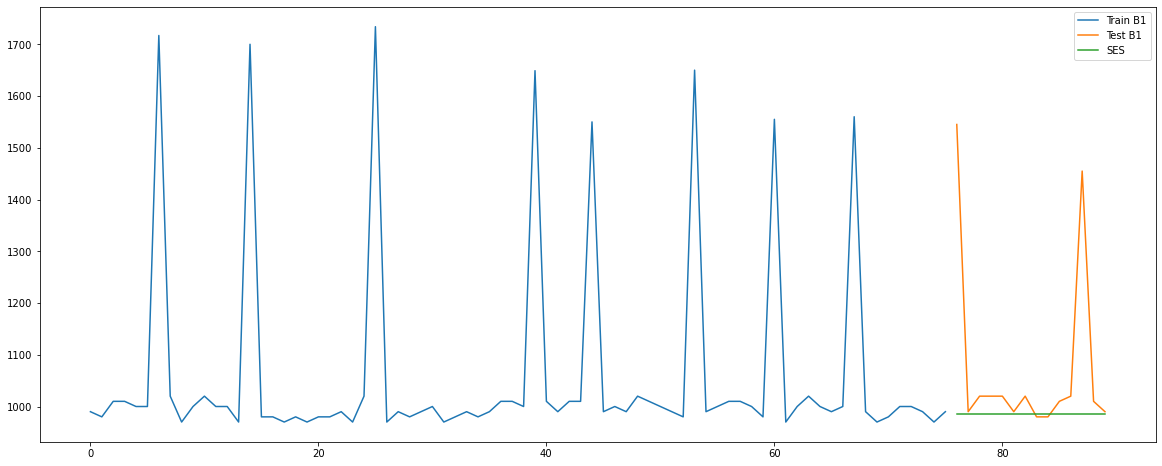

In [120]:
y_ses_B1 = test_B1.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_B1['Sales'])).fit(smoothing_level=0.6,optimized=False)
y_ses_B1['SES'] = fit2.forecast(len(test_B1))
plt.figure(figsize=(20,8))
plt.plot(train_B1['Sales'], label='Train B1')
plt.plot(test_B1['Sales'], label='Test B1')
plt.plot(y_ses_B1['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [121]:
print("mae :", mean_absolute_error(test_B1.Sales, y_ses_B1.SES))
print("rmse :", sqrt(mean_squared_error(test_B1.Sales, y_ses_B1.SES)))

mae : 90.81882853422447
rmse : 196.37046419013424


##### v. Holt Linear Trend

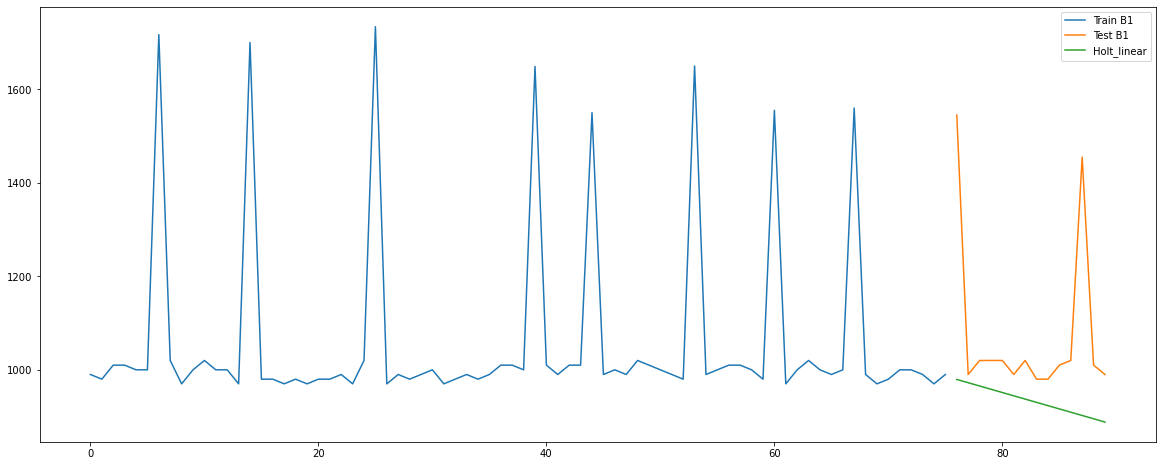

In [122]:
y_hlt_B1 = test_B1.copy()
fit1 = Holt(np.asarray(train_B1['Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hlt_B1['Holt_linear'] = fit1.forecast(len(test_B1))
plt.figure(figsize=(20,8))
plt.plot(train_B1['Sales'], label='Train B1')
plt.plot(test_B1['Sales'], label='Test B1')
plt.plot(y_hlt_B1['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [123]:
print("mae :", mean_absolute_error(test_B1.Sales, y_hlt_B1.Holt_linear))
print("rmse :", sqrt(mean_squared_error(test_B1.Sales, y_hlt_B1.Holt_linear)))

mae : 141.1285437032413
rmse : 222.99729307507283


##### vi. Holt-Winters

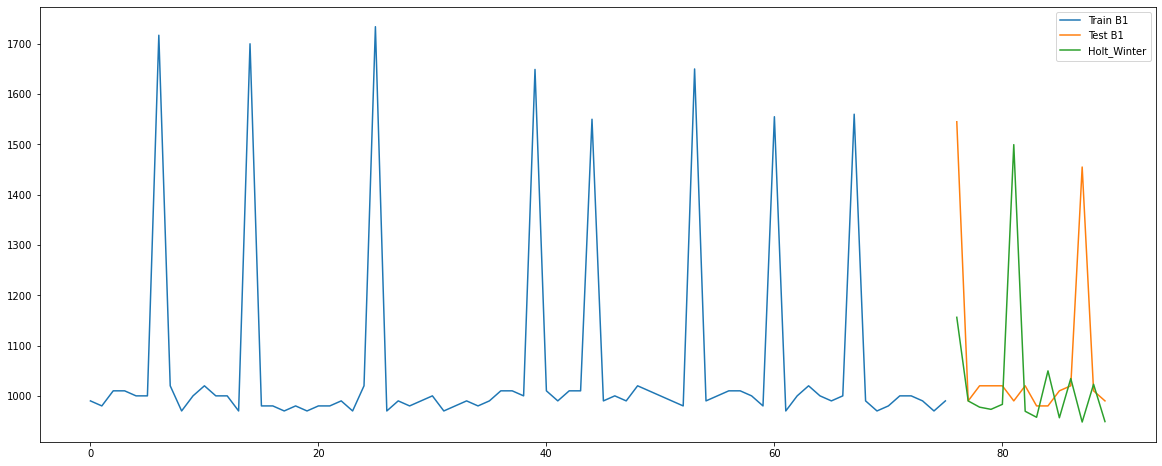

In [214]:
y_hw_B1 = test_B1.copy()
fit1 = ExponentialSmoothing(np.asarray(train_B1['Sales']) ,seasonal_periods=14 ,trend='multiplicative', seasonal='add',).fit()
y_hw_B1['Holt_Winter'] = fit1.forecast(len(test_B1))
plt.figure(figsize=(20,8))
plt.plot(train_B1['Sales'], label='Train B1')
plt.plot(test_B1['Sales'], label='Test B1')
plt.plot(y_hw_B1['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [215]:
print("mae :", mean_absolute_error(test_B1.Sales, y_hw_B1.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test_B1.Sales, y_hw_B1.Holt_Winter)))

mae : 128.3243380691593
rmse : 221.36727561913568


##### vii. ARMA

In [98]:
arma_B1 = dfB1.copy()

In [99]:
arma_B1.drop(['Day', 'Category', 'Product', 'Event'], axis =1, inplace=True)

In [100]:
# Set the start date of the time series
start_date = '2022-01-01'

# Create a date range based on the start date and the length of the data
arma_B1['Day'] = pd.date_range(start=start_date, periods=len(arma_B1), freq='D')

In [102]:
arma_B1.index = pd.to_datetime(arma_B1['Day'])

In [103]:
arma_B1.drop(['Day'], axis=1, inplace=True)

In [104]:
arma_B1.tail(14)

,Sales
Day,
2022-03-18,1545.0
2022-03-19,990.0
2022-03-20,1020.0
2022-03-21,1020.0
2022-03-22,1020.0
2022-03-23,990.0
2022-03-24,1020.0
2022-03-25,980.0
2022-03-26,980.0


<AxesSubplot:xlabel='Day'>

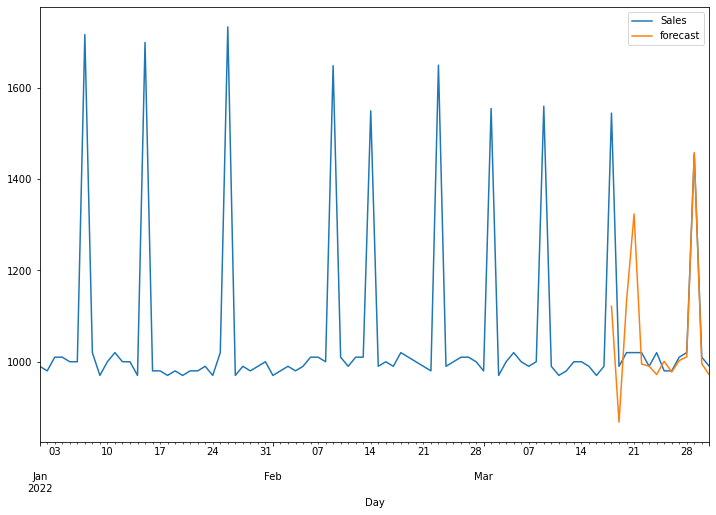

In [377]:
model=sm.tsa.statespace.SARIMAX(arma_B1['Sales'],order=(0,0,0),seasonal_order=(12,1,1,9))
results = model.fit()
arma_B1['forecast'] = results.predict(start=76, end=90, dynamic=True, )
arma_B1[['Sales','forecast']].plot(figsize=(12,8))

In [378]:
print("mae :", mean_absolute_error(arma_B1.Sales.iloc[76:90], arma_B1.forecast.iloc[76:90]))
print("rmse :", sqrt(mean_squared_error(arma_B1.Sales.iloc[76:90], arma_B1.forecast.iloc[76:90])))

mae : 79.49216844698678
rmse : 147.24222004228258


#### 4. Product B2

##### i. Naive Approach

In [268]:
train_B2.head(5)

,index,Day,Category,Product,Sales
0,60,61,B,B2,10.0
1,61,62,B,B2,20.0
2,62,63,B,B2,40.0
3,63,64,B,B2,80.0
4,64,65,B,B2,144.0


In [270]:
X = pd.read_csv('position_salaries.csv')
X

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [284]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [290]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [291]:
train_B2.head(5)

,index,Day,Category,Product,Sales
0,60,61,B,B2,10.0
1,61,62,B,B2,20.0
2,62,63,B,B2,40.0
3,63,64,B,B2,80.0
4,64,65,B,B2,144.0


In [297]:
X=train_B2.iloc[:, 1:2].values
y=train_B2.iloc[:,4].values

In [311]:
X_test=test_B2.iloc[:, 1:2].values
y_test=test_B2.iloc[:,4].values

In [312]:
y_pred=pol_reg.predict(poly_reg.fit_transform(X))

In [310]:
y

array([4091.92882936, 4257.12961244, 4404.47610131, 4533.96829595,
       4645.60619638, 4739.38980258, 4815.31911457, 4873.39413234,
       4913.61485589, 4935.98128522, 4940.49342033, 4927.15126122,
       4895.95480789, 4846.90406034])

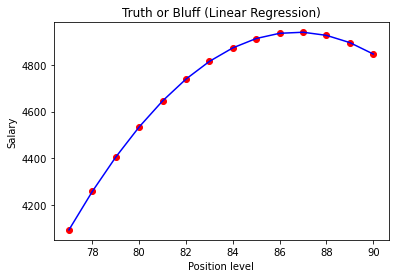

In [321]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [314]:
y_pred

array([4091.92882936, 4257.12961244, 4404.47610131, 4533.96829595,
       4645.60619638, 4739.38980258, 4815.31911457, 4873.39413234,
       4913.61485589, 4935.98128522, 4940.49342033, 4927.15126122,
       4895.95480789, 4846.90406034])

In [315]:
y_test

array([3991.4208    , 4310.734464  , 4440.05649792, 4573.25819286,
       4710.45593864, 4748.13958615, 4786.12470284, 4824.41370046,
       4863.00901007, 4901.91308215, 4941.12838681, 4980.6574139 ,
       4900.        , 4850.        ])

In [322]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("mae :",mae)
print("rmse :",rmse)

mae : 37.62241740681254
rmse : 46.236428847309526


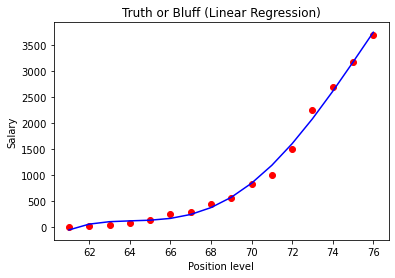

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

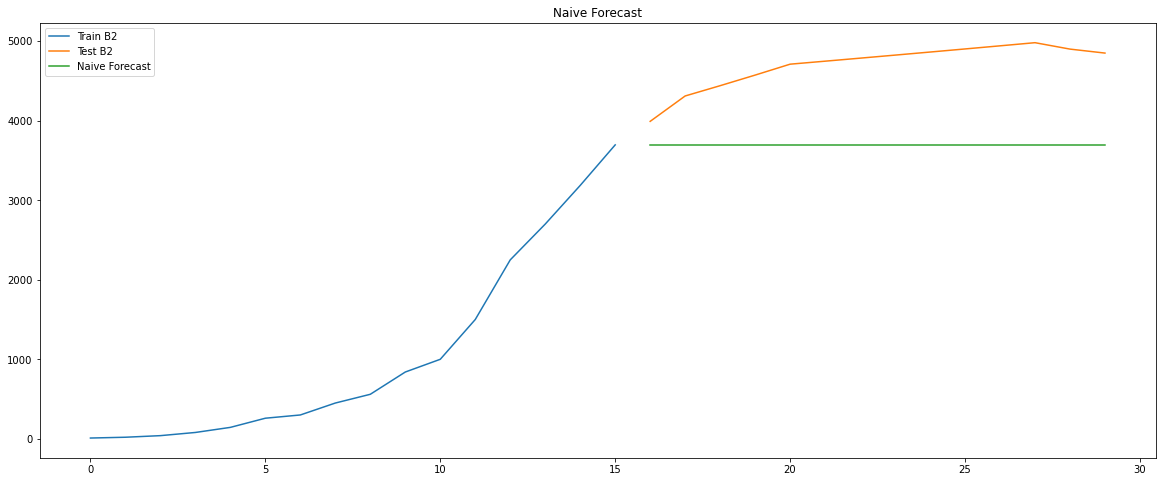

In [126]:
na_B2= np.asarray(train_B2.Sales)
y_na_B2 = test_B2.copy()
y_na_B2['naive'] = na_B2[len(na_B2)-1]
plt.figure(figsize=(20,8))
plt.plot(train_B2.index, train_B2['Sales'], label='Train B2')
plt.plot(test_B2.index,test_B2['Sales'], label='Test B2')
plt.plot(y_na_B2.index,y_na_B2['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [127]:
rmse = sqrt(mean_squared_error(test_B2.Sales, y_na_B2.naive))
mae = mean_absolute_error(test_B2.Sales, y_na_B2.naive)

print("mae :",mae)
print("rmse :",rmse)

mae : 1005.7622697001832
rmse : 1041.6709620578354


##### ii. Simple Average

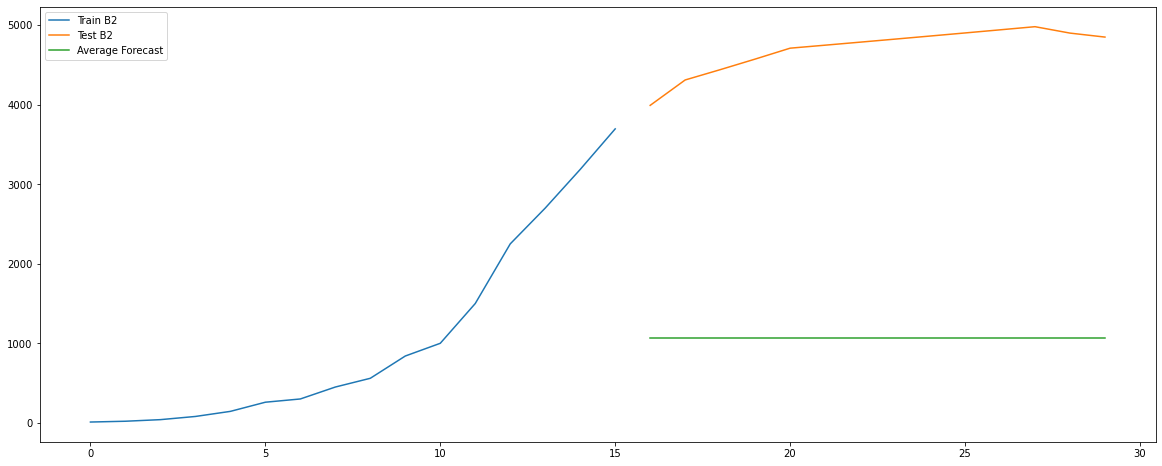

In [128]:
y_sa_B2 = test_B2.copy()
y_sa_B2['avg_forecast'] = train_B2['Sales'].mean()
plt.figure(figsize=(20,8))
plt.plot(train_B2['Sales'], label='Train B2')
plt.plot(test_B2['Sales'], label='Test B2')
plt.plot(y_sa_B2['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [129]:
print("mae :", mean_absolute_error(test_B2.Sales, y_sa_B2.avg_forecast))
print("rmse :", sqrt(mean_squared_error(test_B2.Sales, y_sa_B2.avg_forecast)))

mae : 3636.837269700183
rmse : 3646.9310353120627


##### iii. Moving Average

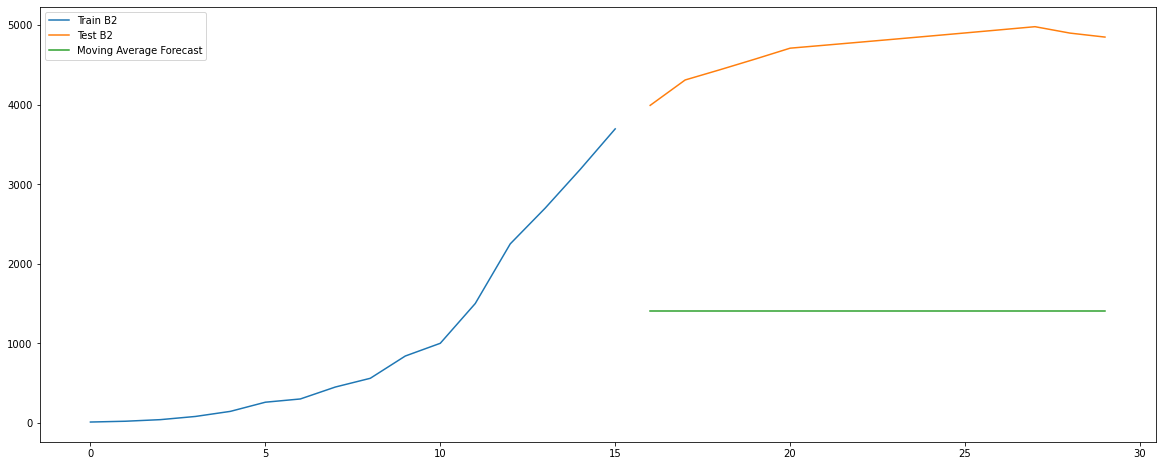

In [130]:
y_ma_B2 = test_B2.copy()
y_ma_B2['moving_avg_forecast'] = train_B2['Sales'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(20,8))
plt.plot(train_B2['Sales'], label='Train B2')
plt.plot(test_B2['Sales'], label='Test B2')
plt.plot(y_ma_B2['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [131]:
print("mae :", mean_absolute_error(test_B2.Sales, y_ma_B2.moving_avg_forecast))
print("rmse :", sqrt(mean_squared_error(test_B2.Sales, y_ma_B2.moving_avg_forecast)))

mae : 3294.442269700183
rmse : 3305.581721638315


##### iv. Simple Exponential Smoothing

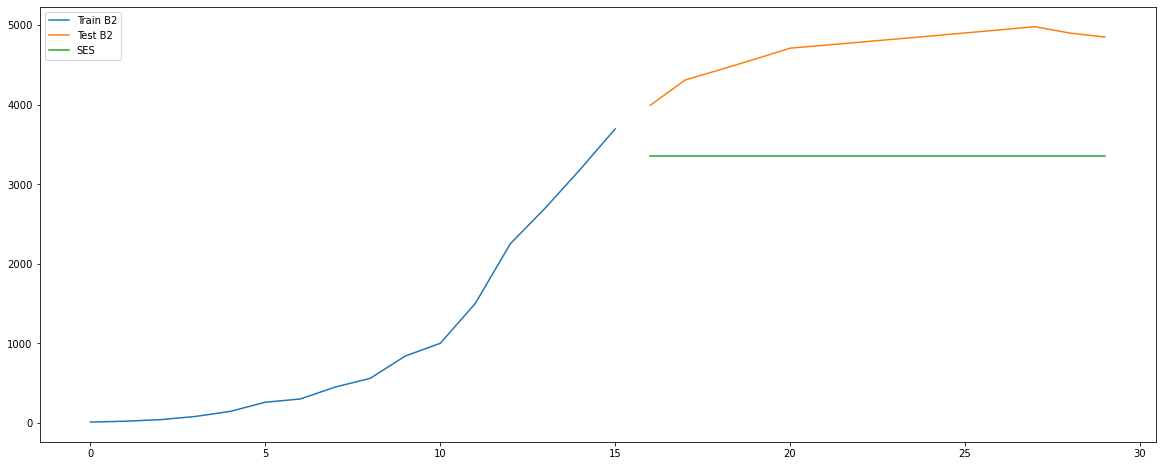

In [132]:
y_ses_B2 = test_B2.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_B2['Sales'])).fit(smoothing_level=0.6,optimized=False)
y_ses_B2['SES'] = fit2.forecast(len(test_B2))
plt.figure(figsize=(20,8))
plt.plot(train_B2['Sales'], label='Train B2')
plt.plot(test_B2['Sales'], label='Test B2')
plt.plot(y_ses_B2['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [133]:
print("mae :", mean_absolute_error(test_B2.Sales, y_ses_B2.SES))
print("rmse :", sqrt(mean_squared_error(test_B2.Sales, y_ses_B2.SES)))

mae : 1341.7823095302606
rmse : 1368.9048236493259


##### v. Holt Linear Trend

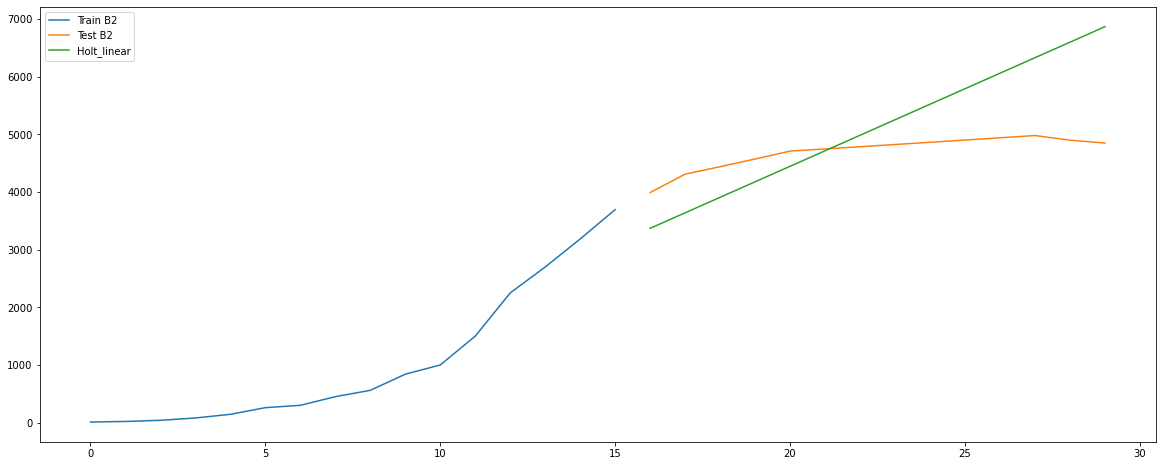

In [134]:
y_hlt_B2 = test_B2.copy()
fit1 = Holt(np.asarray(train_B2['Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hlt_B2['Holt_linear'] = fit1.forecast(len(test_B2))
plt.figure(figsize=(20,8))
plt.plot(train_B2['Sales'], label='Train B2')
plt.plot(test_B2['Sales'], label='Test B2')
plt.plot(y_hlt_B2['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [135]:
print("mae :", mean_absolute_error(test_B2.Sales, y_hlt_B2.Holt_linear))
print("rmse :", sqrt(mean_squared_error(test_B2.Sales, y_hlt_B2.Holt_linear)))

mae : 777.2056952446853
rmse : 957.5677046494789


##### vi. Holt-Winters

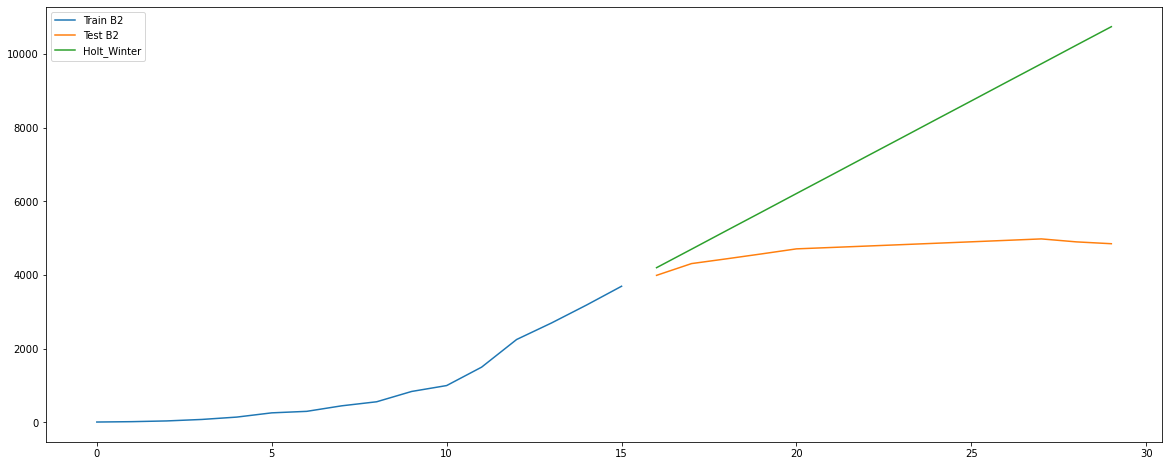

In [157]:
y_hw_B2 = test_B2.copy()
fit1 = ExponentialSmoothing(np.asarray(train_B2['Sales']) ,seasonal_periods=2 ,trend='add', seasonal='add',).fit()
y_hw_B2['Holt_Winter'] = fit1.forecast(len(test_B2))
plt.figure(figsize=(20,8))
plt.plot(train_B2['Sales'], label='Train B2')
plt.plot(test_B2['Sales'], label='Test B2')
plt.plot(y_hw_B2['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [158]:
print("mae :", mean_absolute_error(test_B2.Sales, y_hw_B2.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test_B2.Sales, y_hw_B2.Holt_Winter)))

mae : 2768.7257819676815
rmse : 3302.3277926901683


##### vii. ARMA

In [379]:
arma_B2 = dfB2.copy()

In [381]:
arma_B2.drop(['Day', 'Category', 'Product'], axis =1, inplace=True)

In [382]:
# Set the start date of the time series
start_date = '2022-01-01'

# Create a date range based on the start date and the length of the data
arma_B2['Day'] = pd.date_range(start=start_date, periods=len(arma_B2), freq='D')

In [383]:
arma_B2.index = pd.to_datetime(arma_B2['Day'])

In [384]:
arma_B2.drop(['Day'], axis=1, inplace=True)

In [385]:
arma_B2.tail(14)

,index,Sales
Day,,
2022-01-17,76,3991.420800
2022-01-18,77,4310.734464
2022-01-19,78,4440.056498
2022-01-20,79,4573.258193
2022-01-21,80,4710.455939
2022-01-22,81,4748.139586
2022-01-23,82,4786.124703
2022-01-24,83,4824.413700
2022-01-25,84,4863.009010


In [388]:
arma_B2.shape

(30, 2)

<AxesSubplot:xlabel='Day'>

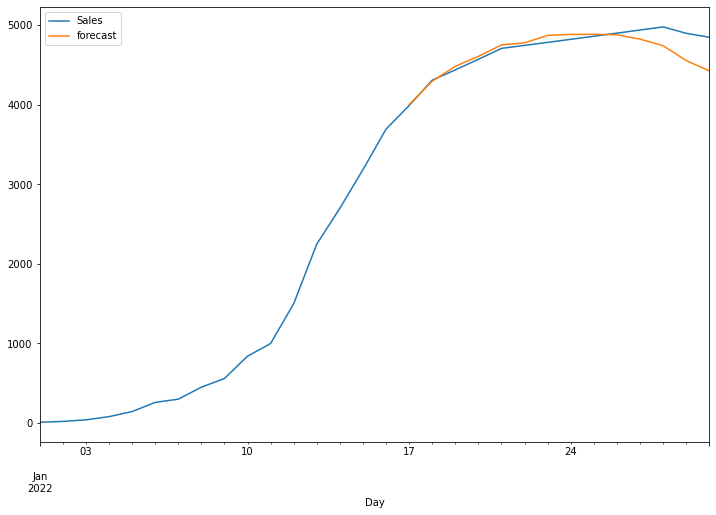

In [520]:
model=sm.tsa.statespace.SARIMAX(arma_B2['Sales'],order=(4,1,4),seasonal_order=(3,0,3,16))
results = model.fit()
arma_B2['forecast'] = results.predict(start=16, end=30, dynamic=True, )
arma_B2[['Sales','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Day'>

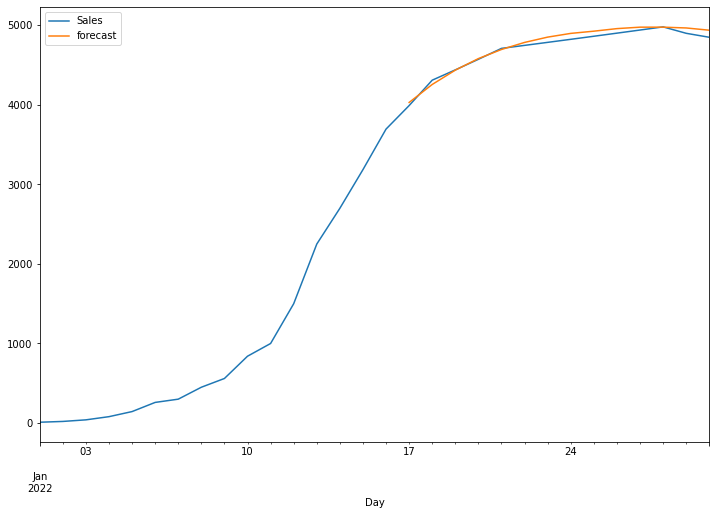

In [548]:
model=sm.tsa.statespace.SARIMAX(arma_B2['Sales'],order=(3,1,3),seasonal_order=(3,0,3,26))
results = model.fit()
arma_B2['forecast'] = results.predict(start=16, end=30, dynamic=True)
arma_B2[['Sales','forecast']].plot(figsize=(12,8))

In [549]:
print("mae :", mean_absolute_error(arma_B2.Sales.iloc[16:30], arma_B2.forecast.iloc[16:30]))
print("rmse :", sqrt(mean_squared_error(arma_B2.Sales.iloc[16:30], arma_B2.forecast.iloc[16:30])))

mae : 43.77778435993845
rmse : 51.4342600862697


## IV. Conclusion